#  Emerging Technologies Tasks 

These are my solutions to the Tasks assessment. 

The author is Cuan O'Connor ( G00300230@gmit.ie ).

***

## Task: Calculate a square root
***

We can calculate the square root of a number using Newtons Method [1,2].

To find the square root $z$ of a number $x$, we can iterate using the following equation. 

$$ z = z - \frac{z^2 - x}{2z} $$


[1] A Tour Of Go; Exercise: Loops and Functions; https://tour.golang.org/flowcontrol/8

[2] Wikipedia; Square root of 2; https://en.wikipedia.org/wiki/Square_root_of_2

In [1]:
# 
def sqrt2(x):
    """
    A function to calculate the square root of a number x.
    x is used for testing and flexibility, but the goal is specifically the sqrt of 2.
    """
    # Initial guess for the square root z.
    z = x / 2
    # Loop until we're happy with the accuracy.
    while abs(x - (z * z)) > 0.00000001:
        # calculate a better guess for the square root.
        z -= (z * z - x) / (2 * z)
    # return the (approximate) square root of x.
    return z

### Tests of the function

Here we test the function with some known values

Includes our main goal of the sqrt of 2

In [2]:
# Test the function on 100.
sqrt2(100)

10.000000000107446

In [3]:
# Test the function on 2.
# Uses a simple output modifier to display to the 100th decimal place (included because specified in the assessment tasks)
result = sqrt2(2)
print("%.100f" % result)

1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000


In [4]:
import math

result2 = math.sqrt(2)
print("%.100f" % result2)

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


## Task 2: Verifying a Chi-Squared Value Using scipy.stats
***

The Chi-squared value has been provided: 24.6. 

The goal is to verify that this is correct using scipy.stats and calculate the associated *p* value.

Using an example found online [1] I was able to decide on a design using a simple array object called dataSet. However the example given shows the use of the panda libraries and in order to keep within the rules of the assessment I decided against using it.

With the scipy.stats we can make use of a powerful function called *chi2_contingency* [2]. Using this we can get actionable data from our dataset, which will be hard coded into the application for simplicity.

Chi2_contingency takes in the dataSet object and displays the types of data provided before the **=**.

- Chi2 is our Chi-Squared value
- p is the p-value of the test
- dof is the degrees of free in the data
- exp is the expected frequencies of the data set


In [5]:
import scipy.stats as stats

# First we get our given data set 
dataSet = [[90,60,104,95],[30,50,51,20],[30,40,45,35]]

# using the built-in function from scipy we can perform actions on our data set
# chi2 is our Chi-squared value
# p is the p-value of the test
# dof is the degrees of freedom in the data
# exp is the expect frequencies
chi2,p,dof,exp = stats.chi2_contingency(dataSet)

In [6]:
print("Actual Chi-Squared Value: ", chi2) 
print("The p-value: ", p)

Actual Chi-Squared Value:  24.5712028585826
The p-value:  0.0004098425861096696


[1] chi2_example; Another example using panda; https://pythonhealthcare.org/2018/04/13/58-statistics-chi-squared-test/

[2] chi2_contigency; An example and clear explanation of how the chi2_contingency works; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

## Task 3: STDDEV and Population vs Sample Data
***

The goal of this task is to decide or prove that getting the Standard deviation on a **sample** sized data set is superior to performing it on a **population** sized set. Then prove this using **numpy** to perform a simulation of this in action.

A **population** data set contains all members of a specified group or the entire list of possible data values.

A **sample data** set contains a part, or a subset of a population.

The **Standard Deviation** [1] is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance.

Both have their merrits when it comes to performing analysis on their data sets, however there are pros and cons to both.

**Population should be used when:**
 - You can easily measure the entire population.
 
**Sample should be used when:**
 - You have a sample of the larger population and only wish to measure this sample
 - The population data set is harder to quantify e.g. The number of people who speak spanish in Ireland.
 
Measuring an entire population is, more often than not, difficult to obtain the full accurate data on, therefor a sample data set should be used.

The numpy function for calculating standard deviation is: 
```python
np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
```

In the example I have set up below, I use the same action twice. However, in the option parameters I have included the ddof.
 - The ddof is the [5] Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
 
The difference between the two values is apparent although quite small.
The idea is that if these functions were applied to a massive dataset, it may well be impossible to obtain the Population stddev because of the potential size. However if we were to perform the action on a sample of the population, it could potentially be much more manageable and accurate.

### Example:

In [7]:
import numpy as np

# Hard coded sample data for the sake of simplicity.
sampleData = [[3,3.5,2.5,3.2],[0,2.1,4,2.9],[3,2,2.6,3.3]] 

"""
By setting the ddof to a number you basically perform an n - ddof on the function.
In doing this we see the difference between:
(The first option) population 
and 
(The second option) sample.
"""
print("Population: ", np.std(sampleData, ddof = 0))
print("Sample: ", np.std(sampleData, ddof = 1))

Population:  0.9722182539601555
Sample:  1.0154488483603512


[1] Defining standard deviation; https://www.investopedia.com/terms/s/standarddeviation.asp

[2] A clear distinction between population and sample data with examples; https://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html#:~:text=A%20population%20data%20set%20contains,list%20of%20possible%20data%20values.&text=A%20sample%20data%20set%20contains,from%20which%20it%20is%20taken.

[3] Information on collecting data from population and sample data sets; https://www.scribbr.com/methodology/population-vs-sample/

[4] Population vs Sample data but with Standard deviation in mind; https://www.thoughtco.com/population-vs-sample-standard-deviations-3126372#:~:text=The%20population%20standard%20deviation%20is,the%20individuals%20in%20a%20population.

[5] NumPy docs; This doc shows the operations of numpy.std and the parameters that can be used to alter the values; https://numpy.org/doc/stable/reference/generated/numpy.std.html#:~:text=The%20standard%20deviation%20is%20the,N%20%3D%20len(x)%20.

## Task 4: Applying k-means clustering to Fisher’s Iris data set

***

#### The goal/objective of this task is to use scikit-learn to apply k-means clustering to Fisher’s Iris data set.

So what is **scikit learn** and why use it?

Scikit learn or SKLearn is a library for machine learning in python [1] . It contains tools for machine learning and static modelling. The one of most interest to us in the current context is clustering.

**K-means**

K-means is one of most popular clustering algorithms. It assigns datapoints to clusters based on centroids (points which are the center of a cluster). K-means attempts to find the best centroids for your data. [2] The goal of the algorithm is to partition the data into a set, such that the total sum of squared distances from each point, to the mean point of the cluster is minimized.

It works something like this:

- Choose a *k* value (number of clusters to create).
- Initialize *k* starting points in the data.
- Create the clusters (to the nearest centroid).
- Improve them (centroid moves to the center of the cluster).
- Repeat above until centroids converge or gather.

[3]

**The Iris data set**

The iris data set is widely used as a beginner's dataset for machine learning purposes.

"The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other." - [4] 

It provides the perfect kind of data for us to use sklearn and kmeans clustering in a python code example.

### Example:

In [8]:
# Plotting
import matplotlib.pyplot as plt

# Grabbing Iris datasets
from sklearn import datasets

# Machine Learning - Kmeans
from sklearn.cluster import KMeans

In [9]:
# Load the Iris data set
iris = datasets.load_iris()

Text(0, 0.5, 'Sepal Width')

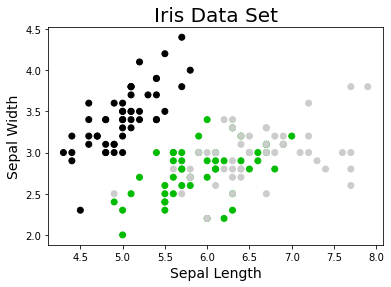

In [23]:
# Define target and predictors
# choose our 2 features (Sepal L & W)
x = iris.data[:, :2] 
y = iris.target

# Displaying data in a scatterplot
plt.scatter(x[:,0], x[:,1], c=y, cmap='nipy_spectral')
plt.title('Iris Data Set', fontsize=20)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)

### What does the code do?

The data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

For the demonstration I chose to display 2 of the features of the dataset.

I used *iris.data* and *iris.target* to display my data [5] .

I then plotted it the 2 features chosen prior:
- *Sepal Length*
- *Sepal Width*

From there I simply used the scatter function from matplotlib which takes the sepal Length and sepal Width for the 3 different species of Iris and colors each *target* corosponding to each species.

The plotted data is then displayed as shown above, after labeling the x and y axis'.

**Accuracy**

The accuracy of the plotted data is difficult to define. 

One way to measure it might be to have a preclustered dataset and then compare your own cluster to it.

This is not fault tolerant obviously because if the control cluster is inaccurate you may get  a bad sense of false gratification from comparing your own cluster. 

If you decide to test it in this way, you should find a "known accurate cluster" to compare your own cluster. If your results strongly differ then you know your data is inaccurate. This is the best possible measure of accuracy in my opinion.

**Predicting Species of Iris**

This model for displaying Iris species data is potentially very efficient way of making predictions for other species of Iris. 

The idea is that you take your 3 from the Iris data set and you compare the differences in each species. You form your clusters of data and compare those values. 

If there is any commonality or trend in the flowers, it is feasable that you could predict how another species might be like. 

If all the sepal lengths corrolate to the same place or near to it, one can safely assume that this is a good model for measuring other potential species.



[1] scikit learn website; getting started page; https://scikit-learn.org/stable/getting_started.html

[2] Kmeans; concepts and working examples; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

[3] How kmeans works; https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0

[4] Iris flower data set; Wikipedia entry; https://en.wikipedia.org/wiki/Iris_flower_data_set

[5] Some guidance on displaying iris data in python; https://www.ritchieng.com/machine-learning-iris-dataset/

***
# End